
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Main Figure 5
-----

In [1]:
import os
import pickle as pkl

import pandas as pd
import numpy as np

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

import matplotlib.pylab as plt


-----
##### Set up input / output directories

In [2]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

In [10]:
#df_all = pd.read_csv(os.path.join(root_dir, 'source_data/expression_data.tsv'), sep='\t')
df_all = pd.read_csv(os.path.join('/Users/mehdi/Documents/Nature_Submission', 'source_data/expression_data.tsv'), sep='\t')


In [11]:
df_all.head()

,index,Platinum Signature,Gene,Expression,Dataset,MarkerType
0,KiCS0002_321321,Y,ABCC2,11.383704,Dataset 1,Advanced-Treated
1,KiCS0008_289185,Y,ABCC2,12.457381,Dataset 1,Advanced-Treated
2,KiCS0010_270645,L,ABCC2,7.392317,Dataset 1,Advanced-Treated
3,KiCS0010_270647,Y,ABCC2,8.033423,Dataset 1,Advanced-Treated
4,KiCS0016_270650,Y,ABCC2,6.285402,Dataset 1,Advanced-Treated


-----------
## Panel a

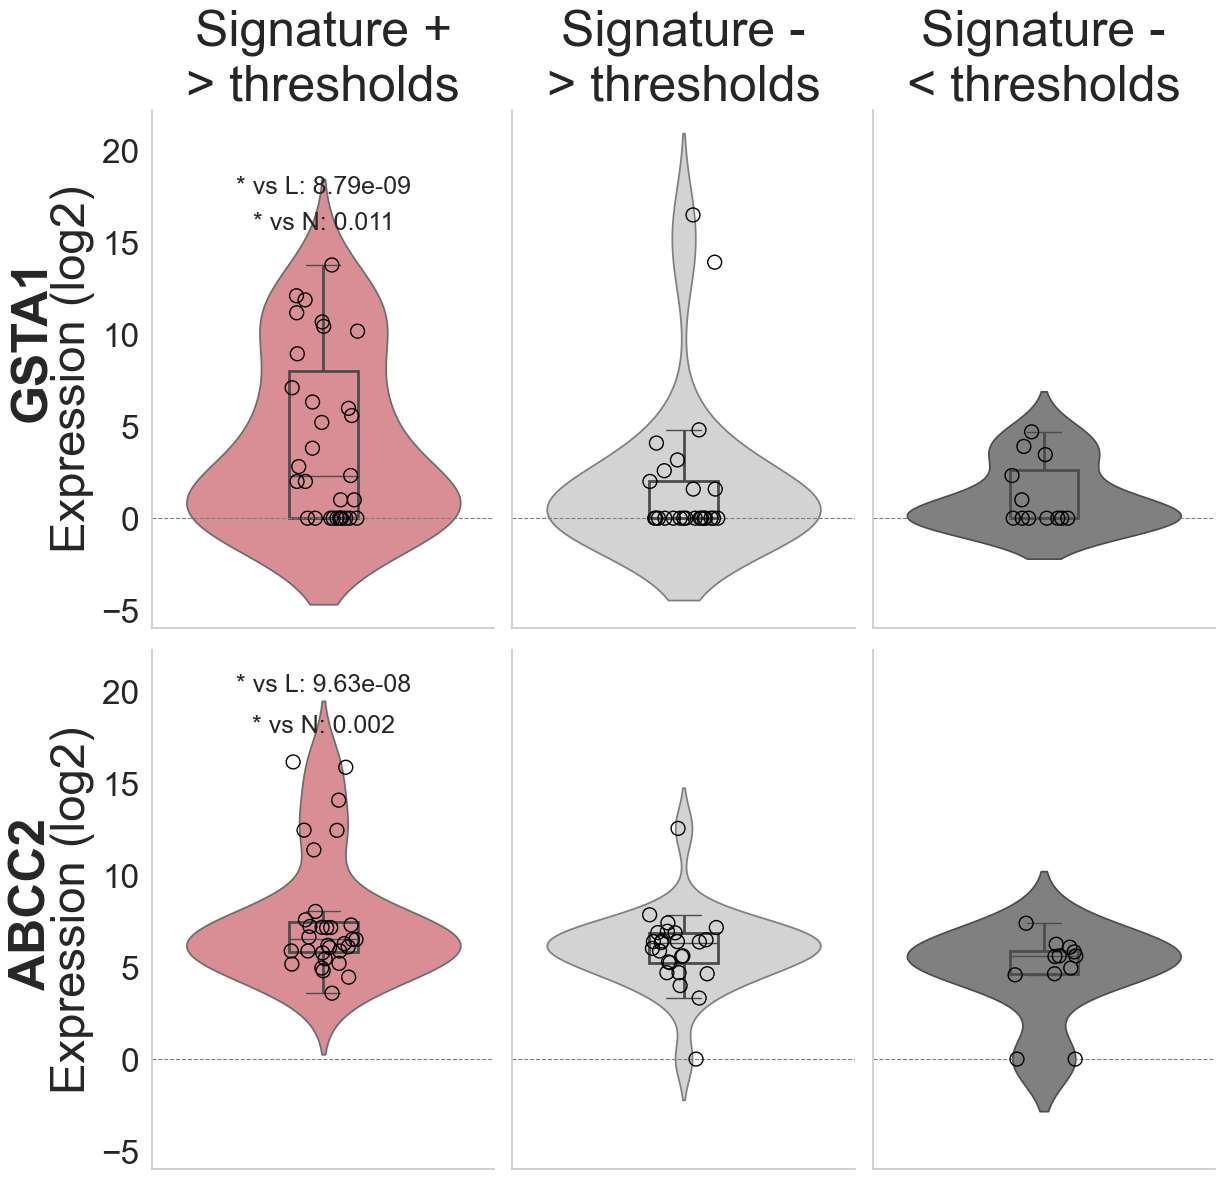

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your full dataframe
# You must concatenate ABCC2 and GSTA1 dfs beforehand
#df_all = pd.concat([df_long1A, df_long1G], ignore_index=True)  # or however you have them

marker_map = {
    'Advanced-Treated': 'o',
    'Primary-Treated': '^'
}

# P-value data
pvals = {
    'GSTA1': {'1v3': 8.788393e-09, '1v2': 0.010775},
    'ABCC2': {'1v3': 9.631309e-08, '1v2': 0.001582}
}


palette = {'Y': '#E6818C', 'N': 'lightgray', 'L': 'gray'}  # Customize as needed

sns.set(style='whitegrid')
fig, axes = plt.subplots(2, 3, figsize=(12, 12), sharey=True)

genes = ['GSTA1', 'ABCC2']
signatures = ['Y', 'N', 'L']

custom_titles = [
    ['Signature +\n> thresholds',
    'Signature -\n> thresholds',
    'Signature -\n< thresholds'],
    ['',
    '',
    '']
]


for i, gene in enumerate(genes):
    for j, sig in enumerate(signatures):
        ax = axes[i, j]
        subset = df_all[(df_all['Gene'] == gene) & (df_all['Platinum Signature'] == sig)]

        # Violin plot
        sns.violinplot(
            data=subset,
            x='Gene',
            y='Expression',
            color=palette[sig],
            inner=None,
            ax=ax
        )

        # Boxplot inside violin
        sns.boxplot(
            data=subset,
            x='Gene',
            y='Expression',
            showcaps=True,
            boxprops={'facecolor': 'none', 'linewidth': 2},
            whiskerprops={'linewidth': 2},
            flierprops={'marker': '', 'markersize': 0},
            saturation=1,
            width=0.2,
            ax=ax
        )

        sns.stripplot(
            x='Gene',
            y='Expression',
            data=subset,
            dodge=True,             # separate points by hue
            facecolors='none',
            alpha=1,
            size=10,
            edgecolor='black',
            linewidth=1,
            ax=ax
        )

        # Aesthetics
        ax.set_xlabel('')
        if j == 0:
            ax.set_ylabel("Expression (log2)", fontsize=34)
        else:
            ax.set_ylabel("")

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)

        if ax.get_legend():
            ax.legend_.remove()
        ax.set_xticklabels([])
        ax.tick_params(axis='y', labelsize=24)
        ax.set_title(custom_titles[i][j], fontsize=36)

        # Add p-value annotations for first column only
        if j == 0:
            y_max = ax.get_ylim()[1]
            
            # Annotation for col 1 vs 3
            pval_13 = pvals[gene]['1v3']
            pval_text_13 = f"* vs L: {pval_13:.2e}"
            ax.text(0, y_max * 0.9, pval_text_13, ha='center', fontsize=18)
            
            # Annotation for col 1 vs 2
            pval_12 = pvals[gene]['1v2']
            pval_text_12 = f"* vs N: {pval_12:.3f}"
            ax.text(0, y_max * 0.8, pval_text_12, ha='center', fontsize=18)
        ax.grid(False)



# Add gene row labels on the left side
fig.text(0.0001, 0.71, 'GSTA1', ha='center', va='center', fontsize=36, rotation='vertical', fontweight='bold')
fig.text(0.0001, 0.24, 'ABCC2', ha='center', va='center', fontsize=36, rotation='vertical', fontweight='bold')


plt.tight_layout()

#plt.savefig(os.path.join('/Users/mehdi/Documents/MyRepos/mutsigs_therapy/figures', 'Fig_5a_rev.pdf'), dpi=300, bbox_inches='tight')

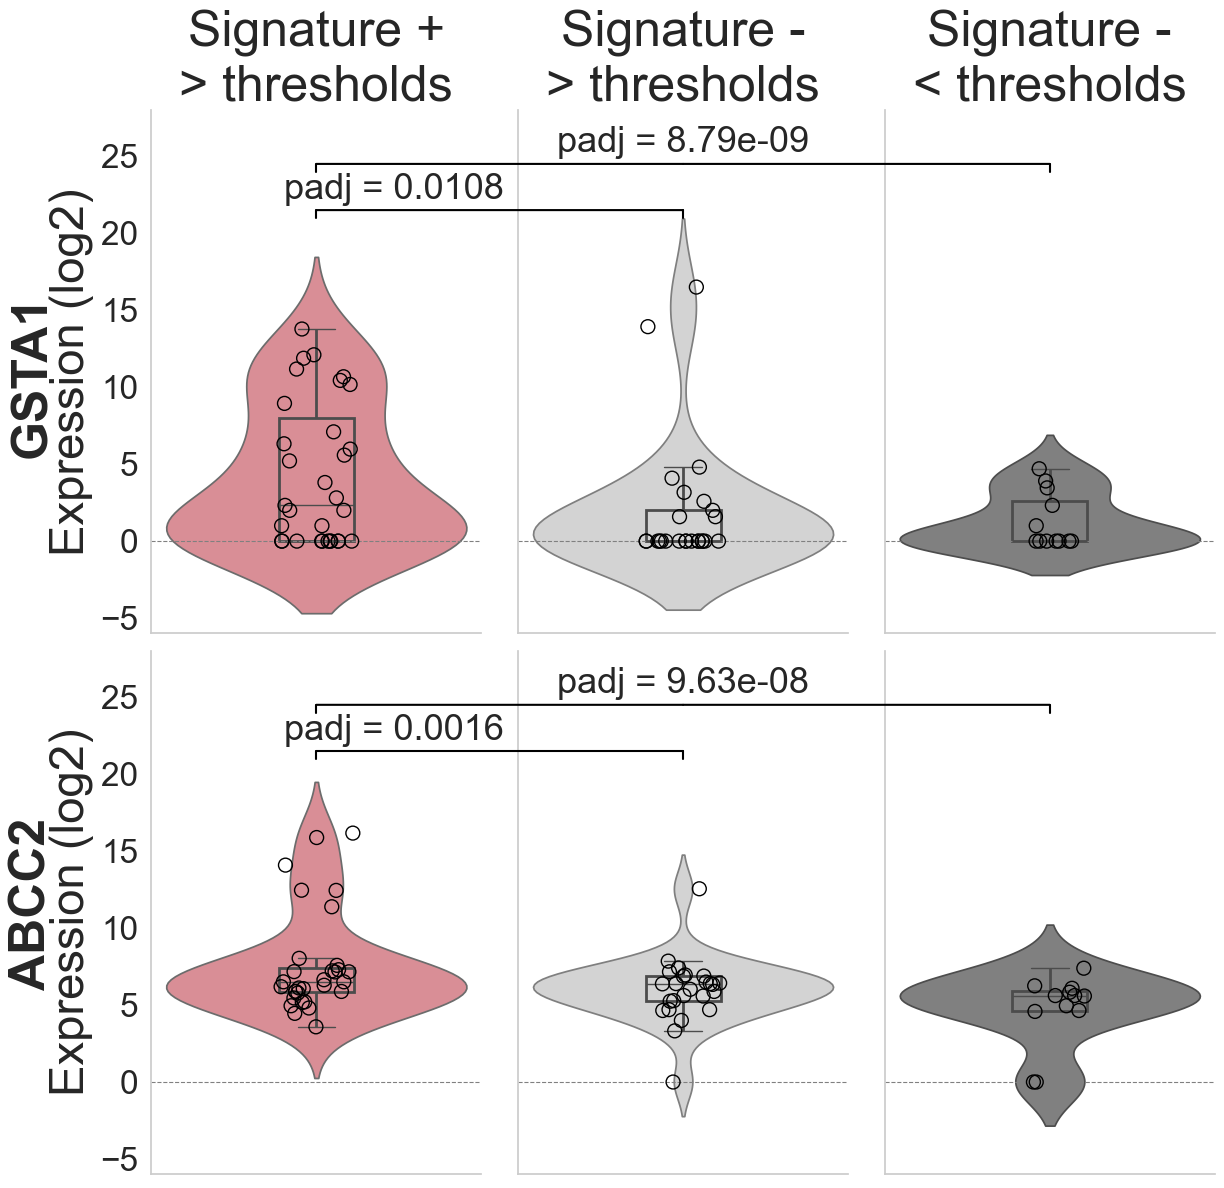

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import ConnectionPatch

marker_map = {
    'Advanced-Treated': 'o',
    'Primary-Treated': '^'
}

palette = {'Y': '#E6818C', 'N': 'lightgray', 'L': 'gray'}

sns.set(style='whitegrid')
fig, axes = plt.subplots(2, 3, figsize=(12, 12), sharey=True)

genes = ['GSTA1', 'ABCC2']
signatures = ['Y', 'N', 'L']

custom_titles = [
    ['Signature +\n> thresholds',
    'Signature -\n> thresholds',
    'Signature -\n< thresholds'],
    ['',
    '',
    '']
]

# P-value data
pvals = {
    'GSTA1': {'1v3': 8.788393e-09, '1v2': 0.010775},
    'ABCC2': {'1v3': 9.631309e-08, '1v2': 0.001582}
}

for i, gene in enumerate(genes):
    for j, sig in enumerate(signatures):
        ax = axes[i, j]
        subset = df_all[(df_all['Gene'] == gene) & (df_all['Platinum Signature'] == sig)]

        # Violin plot
        sns.violinplot(
            data=subset,
            x='Gene',
            y='Expression',
            color=palette[sig],
            inner=None,
            ax=ax
        )

        # Boxplot inside violin
        sns.boxplot(
            data=subset,
            x='Gene',
            y='Expression',
            showcaps=True,
            boxprops={'facecolor': 'none', 'linewidth': 2},
            whiskerprops={'linewidth': 2},
            flierprops={'marker': '', 'markersize': 0},
            saturation=1,
            width=0.2,
            ax=ax
        )

        sns.stripplot(
            x='Gene',
            y='Expression',
            data=subset,
            dodge=True,
            facecolors='none',
            alpha=1,
            size=10,
            edgecolor='black',
            linewidth=1,
            ax=ax
        )

        # Aesthetics
        ax.set_xlabel('')
        if j == 0:
            ax.set_ylabel("Expression (log2)", fontsize=34)
        else:
            ax.set_ylabel("")

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)

        if ax.get_legend():
            ax.legend_.remove()
        ax.set_xticklabels([])
        ax.tick_params(axis='y', labelsize=24)
        ax.set_title(custom_titles[i][j], fontsize=36)
        ax.grid(False)

# Add p-value annotations spanning across subplots
for i, gene in enumerate(genes):
    # Get the maximum y value across all three columns for this gene
    #y_max = max([axes[i, j].get_ylim()[1] for j in range(3)])
    y_max = 22
    
    # Format p-values
    pval_13 = pvals[gene]['1v3']
    pval_text_13 = f"padj = {pval_13:.2e}" if pval_13 < 0.001 else f"padj = {pval_13:.4f}"
    
    pval_12 = pvals[gene]['1v2']
    pval_text_12 = f"padj = {pval_12:.2e}" if pval_12 < 0.001 else f"padj = {pval_12:.4f}"
    
    # Extend y-axis limit to show brackets
    y_new_max = y_max + 6
    for j in range(3):
        axes[i, j].set_ylim(axes[i, j].get_ylim()[0], y_new_max)
    
    # Bracket for column 0 vs column 1
    y_bracket_12 = y_max -1
    # Left tick
    axes[i, 0].plot([0, 0], [y_bracket_12, y_bracket_12+0.5], lw=1.5, c="black", clip_on=False)
    # Right tick  
    axes[i, 1].plot([0, 0], [y_bracket_12, y_bracket_12+0.5], lw=1.5, c="black", clip_on=False)
    # Horizontal line connecting them
    con = ConnectionPatch((0, y_bracket_12+0.5), (0, y_bracket_12+0.5), 
                          "data", "data", axesA=axes[i, 0], axesB=axes[i, 1], 
                          color="black", lw=1.5)
    fig.add_artist(con)
    # Text in the middle
    axes[i, 0].text(0.5, y_bracket_12+0.8, pval_text_12, ha="right", va="bottom", fontsize=26, clip_on=False)
    
    # Bracket for column 0 vs column 2
    y_bracket_13 = y_max + 2
    # Left tick
    axes[i, 0].plot([0, 0], [y_bracket_13, y_bracket_13+0.5], lw=1.5, c="black", clip_on=False)
    # Right tick
    axes[i, 2].plot([0, 0], [y_bracket_13, y_bracket_13+0.5], lw=1.5, c="black", clip_on=False)
    # Horizontal line - need two segments
    con1 = ConnectionPatch((0, y_bracket_13+0.5), (0, y_bracket_13+0.5), 
                           "data", "data", axesA=axes[i, 0], axesB=axes[i, 1], 
                           color="black", lw=1.5)
    con2 = ConnectionPatch((0, y_bracket_13+0.5), (0, y_bracket_13+0.5), 
                           "data", "data", axesA=axes[i, 1], axesB=axes[i, 2], 
                           color="black", lw=1.5)
    fig.add_artist(con1)
    fig.add_artist(con2)
    # Text in the middle
    axes[i, 1].text(0, y_bracket_13+0.8, pval_text_13, ha="center", va="bottom", fontsize=26, clip_on=False)

# Add gene row labels on the left side
fig.text(0.0001, 0.68, 'GSTA1', ha='center', va='center', fontsize=36, rotation='vertical', fontweight='bold')
fig.text(0.0001, 0.24, 'ABCC2', ha='center', va='center', fontsize=36, rotation='vertical', fontweight='bold')

plt.tight_layout()

plt.savefig(os.path.join('/Users/mehdi/Documents/MyRepos/mutsigs_therapy/figures', 'Fig_5a_rev2.pdf'), dpi=300, bbox_inches='tight')

28.2333462922686

-----------
## Panel b

In [24]:
#df = pd.read_csv(os.path.join(root_dir, 'source_data/PROFYLE_outcomes.tsv'), sep='\t')
df = pd.read_csv(os.path.join('/Users/mehdi/Documents/Nature_Submission', 'source_data/PROFYLE_outcomes.tsv'), sep='\t')


#df['date'] = pd.to_datetime(df['date'])
df.head(2)

,patient,label,day_from_dx,log_day_from_dx
0,PRO-00618,Diagnosis,0,0.000000
1,PRO-00618,WGS,523,2.719331


3.6462264020000004


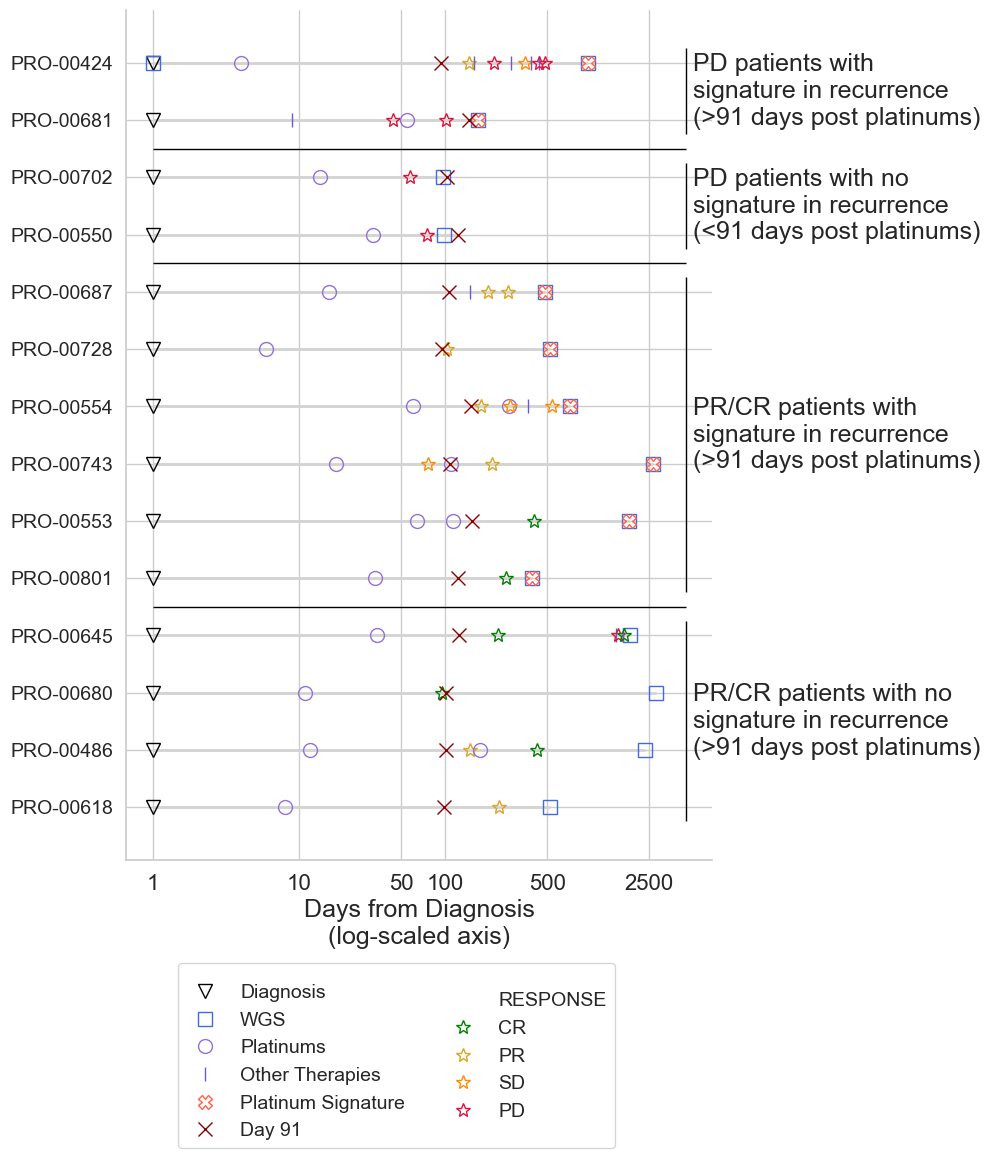

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # for log
from datetime import datetime



# Map labels to marker and color
marker_map = {
    'Diagnosis': ('v', 'black'),
    'WGS': ('s', 'royalblue'),
    'Platinums': ('o', 'mediumpurple'),
    'Other Therapies': ('|', 'slateblue'),
    'Platinum Signature': ('X', 'tomato'),
    'Day 91': ('x', 'darkred'),
    '\nRESPONSE': ('', 'black'),
    'CR': ('*', 'green'),
    'PR': ('*', 'goldenrod'),
    'SD': ('*', 'darkorange'),
    'PD': ('*', 'crimson'),
}



# Plot
fig, ax = plt.subplots(figsize=(10, 12))

for i, patient in enumerate(df['patient'].unique()):
    patient_df = df[df['patient'] == patient]
    first_platinum = patient_df[patient_df['label'] == 'Platinums']['day_from_dx'].min()
    day_91 = first_platinum + 91
    patient_df = pd.concat([patient_df, pd.DataFrame([pd.Series({'patient': patient, 'label': 'Day 91', 'day_from_dx': day_91, 'log_day_from_dx': np.log10(day_91)})])])
    ax.hlines(y=i, xmin=0, xmax=patient_df['log_day_from_dx'].max(), color='lightgray', linewidth=2)

    for _, row in patient_df.iterrows():
        label = row['label']
        marker, color = marker_map.get(label, ('x', 'gray'))
        x = row['log_day_from_dx']
        ax.plot(x, i, marker=marker, markerfacecolor='none', markeredgecolor=color, markersize=10, linestyle='')



# Y-axis
ax.set_yticks(range(len(df['patient'].unique())))
ax.set_yticklabels(df['patient'].unique(), fontsize=14)

# X-axis ticks (log scale with actual day labels)
tick_days = [1, 10, 50, 100, 500, 2500]
tick_positions = np.log10(np.array(tick_days))
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_days, fontsize=16)
ax.set_xlabel('Days from Diagnosis\n(log-scaled axis)', fontsize=18)
ax.set_title('', fontsize=20)

# Legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker=m, color='w', label=l,
                          markerfacecolor='none', markeredgecolor=c, markersize=10)
                   for l, (m, c) in marker_map.items()]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.85, -0.35), loc='lower right', fontsize=14, ncol = 2)


ax.spines[['top', 'right']].set_visible(False)



# Add bracket for PR/CR patients (first two rows: y=0 and y=1)
y0, y1 = 0, 3  # these are the row indices for the first two patients
x_pos = df['log_day_from_dx'].max() + 0.2  # slightly beyond the max x
ax.vlines(x=x_pos, ymin=y0-0.25, ymax=y1+0.25, color='black', linewidth=1)
ax.text(x_pos + 0.05, (y0 + y1)/2, 'PR/CR patients with no\nsignature in recurrence\n(>91 days post platinums)', va='center', ha='left', fontsize=18)
ax.hlines(y=y1+0.5, xmin=0, xmax=x_pos, color='black', linewidth=1)

# Add bracket for PR/CR patients (first two rows: y=0 and y=1)
y0, y1 = 4, 9  # these are the row indices for the first two patients
x_pos = df['log_day_from_dx'].max() + 0.2  # slightly beyond the max x
ax.vlines(x=x_pos, ymin=y0-0.25, ymax=y1+0.25, color='black', linewidth=1)
ax.text(x_pos + 0.05, (y0 + y1)/2, 'PR/CR patients with\nsignature in recurrence\n(>91 days post platinums)', va='center', ha='left', fontsize=18)
ax.hlines(y=y1+0.5, xmin=0, xmax=x_pos, color='black', linewidth=1)

# Add bracket for PD patients (first two rows: y=0 and y=1)
y0, y1 = 10, 11  # these are the row indices for the first two patients
x_pos = df['log_day_from_dx'].max() + 0.2  # slightly beyond the max x
print(x_pos)
ax.vlines(x=x_pos, ymin=y0-0.25, ymax=y1+0.25, color='black', linewidth=1)
ax.text(x_pos + 0.05, (y0 + y1)/2, 'PD patients with no\nsignature in recurrence\n(<91 days post platinums)', va='center', ha='left', fontsize=18)
ax.hlines(y=y1+0.5, xmin=0, xmax=x_pos, color='black', linewidth=1)

# Add bracket for PD patients (first two rows: y=0 and y=1)
y0, y1 = 12, 13  # these are the row indices for the first two patients
x_pos = df['log_day_from_dx'].max() + 0.2  # slightly beyond the max x
ax.vlines(x=x_pos, ymin=y0-0.25, ymax=y1+0.25, color='black', linewidth=1)
ax.text(x_pos + 0.05, (y0 + y1)/2, 'PD patients with \nsignature in recurrence\n(>91 days post platinums)', va='center', ha='left', fontsize=18)

plt.tight_layout()

plt.savefig(os.path.join('/Users/mehdi/Documents/MyRepos/mutsigs_therapy/figures', 'Fig_5b_rev.pdf'), dpi=300, bbox_inches='tight')

-----------
## Panel c

X (PD vs SD): 4.05
Y (PD vs CR): 6.42


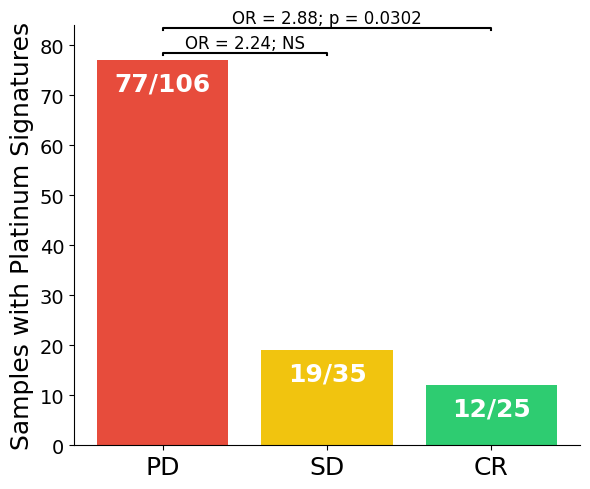

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
counts = {"PD": 77, "SD": 19, "CR": 12}
bar_labels = ['77/106', '19/35', '12/25']

or_p_value_1 = 'OR = 2.24; NS'
or_p_value_2 = 'OR = 2.88; p = 0.0302'

# Calculate fold changes
X = counts["PD"] / counts["SD"]
Y = counts["PD"] / counts["CR"]

print(f"X (PD vs SD): {X:.2f}")
print(f"Y (PD vs CR): {Y:.2f}")

# Bar plot
fig, ax = plt.subplots(figsize=(6, 5))
labels = list(counts.keys())
values = list(counts.values())
bars = ax.bar(labels, values, color=["#E74C3C", "#F1C40F", "#2ECC71"])

for bar, lab in zip(bars, bar_labels):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height - 7, lab,
            ha='center', va='bottom', fontsize=18, fontweight='bold', color='white')

# Bracket annotation function
def add_bracket(ax, x1, x2, y, text):
    ax.plot([x1, x1, x2, x2], [y, y+0.5, y+0.5, y], lw=1.5, c="black")
    ax.text((x1+x2)/2, y+0.6, text, ha="center", va="bottom", fontsize=12)

# Add brackets for X and Y comparisons
y_max = max(values)
add_bracket(ax, 0, 1, y_max + 1, or_p_value_1)
add_bracket(ax, 0, 2, y_max + 6, or_p_value_2)

# Labels
ax.set_ylabel("Samples with Platinum Signatures", fontsize=18)
ax.set_title("")
ax.set_ylim(0, y_max + 7)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=14)

ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
#plt.savefig(os.path.join('/Users/mehdi/Documents/MyRepos/mutsigs_therapy/figures', 'Fig_5c_rev.pdf'), dpi=300, bbox_inches='tight')

In [70]:
from scipy.stats import fisher_exact

print(fisher_exact([[77, (106-77)], [12, 13]], alternative='two-sided'))

SignificanceResult(statistic=2.8764367816091956, pvalue=0.030208444347265564)


X (PD vs SD): 1.34
Y (PD vs CR): 1.51


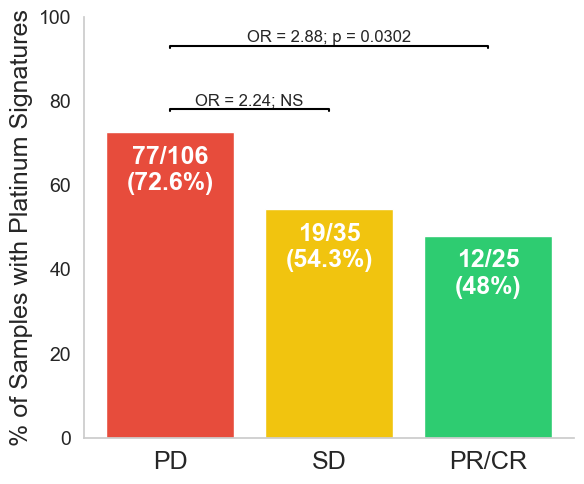

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Data
counts = {"PD": (77/106)*100, "SD": (19/35)*100, "PR/CR": (12/25)*100}
bar_labels = ['77/106\n(72.6%)', '19/35\n(54.3%)', '12/25\n(48%)']

or_p_value_1 = 'OR = 2.24; NS'
or_p_value_2 = 'OR = 2.88; p = 0.0302'

# Calculate fold changes
X = counts["PD"] / counts["SD"]
Y = counts["PD"] / counts["PR/CR"]

print(f"X (PD vs SD): {X:.2f}")
print(f"Y (PD vs CR): {Y:.2f}")

# Bar plot
fig, ax = plt.subplots(figsize=(6, 5))
labels = list(counts.keys())
values = list(counts.values())
bars = ax.bar(labels, values, color=["#E74C3C", "#F1C40F", "#2ECC71"])

for bar, lab in zip(bars, bar_labels):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height - 15, lab,
            ha='center', va='bottom', fontsize=18, fontweight='bold', color='white')

# Bracket annotation function
def add_bracket(ax, x1, x2, y, text):
    ax.plot([x1, x1, x2, x2], [y, y+0.5, y+0.5, y], lw=1.5, c="black")
    ax.text((x1+x2)/2, y+0.6, text, ha="center", va="bottom", fontsize=12)

# Add brackets for X and Y comparisons
y_max = max(values)
add_bracket(ax, 0, 1, y_max + 5, or_p_value_1)
add_bracket(ax, 0, 2, y_max + 20, or_p_value_2)

# Labels
ax.set_ylabel("% of Samples with Platinum Signatures", fontsize=18)
ax.set_title("")
ax.set_ylim(0, 100)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=14)

ax.spines[['top', 'right']].set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.savefig(os.path.join('/Users/mehdi/Documents/MyRepos/mutsigs_therapy/figures', 'Fig_5c_rev2.pdf'), dpi=300, bbox_inches='tight')